In [1]:
from utils.DataInterface import DataInterface

data_iface = DataInterface()

project_root = data_iface.find_project_root()
sirius_data_path = project_root / "data/NanoFTIR"


Project Root: /Users/lugarini/Documents/nano-optics-ml
Data Directory: /Users/lugarini/Documents/nano-optics-ml/data

Contents of the main data directory:
- .DS_Store (File)
- Chen2021 (Dir)
- NanoFTIR (Dir)


In [2]:
files = data_iface.list_folder_contents()
print("Files in ALS June 2025 folder:")
for f in files:
    print(f)

Files in ALS June 2025 folder:
/Users/lugarini/Documents/nano-optics-ml/data/.DS_Store
/Users/lugarini/Documents/nano-optics-ml/data/Chen2021
/Users/lugarini/Documents/nano-optics-ml/data/NanoFTIR


In [3]:
import pandas as pd
def extract_txt_data(filepath):
    """
    Extracts metadata and tabular data from the specified .txt file.
    """
    metadata = {}
    data_start_line = 0
    
    with open(filepath, 'r', encoding='utf-8') as file:
        for i, line in enumerate(file):
            if line.startswith('#'):
                clean_line = line[1:].strip()
                if not clean_line:
                    continue
                
                parts = clean_line.split(':', 1)
                if len(parts) == 2:
                    key = parts[0].strip()
                    raw_values = [v.strip() for v in parts[1].split('\t') if v.strip()]
                    
                    if len(raw_values) == 1:
                        metadata[key] = raw_values[0]
                    elif len(raw_values) > 1:
                        metadata[key] = raw_values
                    else:
                        metadata[key] = None
                else:
                    metadata[parts[0].strip()] = None
            else:
                data_start_line = i
                break
                
    df = pd.read_csv(filepath, sep='\t', skiprows=data_start_line)
    df.dropna(axis=1, how='all', inplace=True)
    
    # Strip leading and trailing whitespaces from all column names
    df.columns = df.columns.str.strip()
    
    return metadata, df

In [4]:
from pathlib import Path

def process_folder(folder_path):
    """
    Finds all .txt files in a folder and extracts their data.
    """
    # Create a Path object for the target directory
    folder = Path(folder_path)
    
    # Dictionary to store the extracted data for all files
    all_files_data = {}
    
    # The .glob('*.txt') method filters for only .txt files in the folder
    for file_path in folder.rglob('*.txt'):
        print(f"Reading file: {file_path.name}")
        
        try:
            # Extract data using our custom function
            metadata, df = extract_txt_data(file_path)
            
            # Save the results in the dictionary using the filename as the key
            all_files_data[file_path.name] = {
                'metadata': metadata,
                'data': df
            }
            
        except Exception as e:
            # Catch and print any errors so one bad file does not break the whole loop
            print(f"Error processing {file_path.name}: {e}")
            
    return all_files_data

# --- How to use the script ---

# Specify the path to the folder containing your files
# You can use a relative path (like './my_data_folder') or an absolute path
target_folder = sirius_data_path/"ALS_june_2025"#"./your_folder_name_here"

# Run the batch processing
dataset = process_folder(target_folder)

# Check how many files were successfully processed
print(f"\nSuccessfully processed {len(dataset)} files.")

# Example of how to access the data from the first processed file
if dataset:
    # Get the name of the first file in our dictionary
    first_file_name = list(dataset.keys())[0]
    
    print(f"\nShowing preview for: {first_file_name}")
    print("Metadata keys:", list(dataset[first_file_name]['metadata'].keys()))
    print("Data shape:", dataset[first_file_name]['data'].shape)


Reading file: 2025-06-27 104144 Interferograms Au-Ref02.Sn3o4.txt
Reading file: 2025-06-27 153953 Interferograms Sn3O4_NW_E.txt
Reading file: 2025-06-26 194848 NF LS Sn3O4_NB_B.txt
Reading file: 2025-06-27 184649 Interferograms DICS 2_AU_REF.txt
Reading file: 2025-06-26 171003 NF LS Sn3O4_NB_A.txt
Reading file: 2025-06-27 124015 Interferograms Sn3O4_NW_D.txt
Reading file: 2025-06-26 164430 NF S Sn3O4_NB_A.txt
Reading file: 2025-06-27 072830 NF LS Sn3O4_NB_D.txt
Reading file: 2025-06-27 015042 NF LS Sn3O4_NB_C_VERT.txt
Reading file: 2025-06-27 041244 NF LS Sn3O4_NB_C.txt
Reading file: 2025-06-27 153443 WL Sn3O4_NW_E.txt
Error processing 2025-06-27 153443 WL Sn3O4_NW_E.txt: Error tokenizing data. C error: Expected 3 fields in line 6, saw 5

Reading file: 2025-06-29 093452 WL Sn3O4_NW_I.txt
Error processing 2025-06-29 093452 WL Sn3O4_NW_I.txt: Error tokenizing data. C error: Expected 3 fields in line 6, saw 5

Reading file: 2025-06-27 123638 WL Sn3O4_NW_D.txt
Error processing 2025-06-27 1

<Axes: xlabel='Wavenumber'>

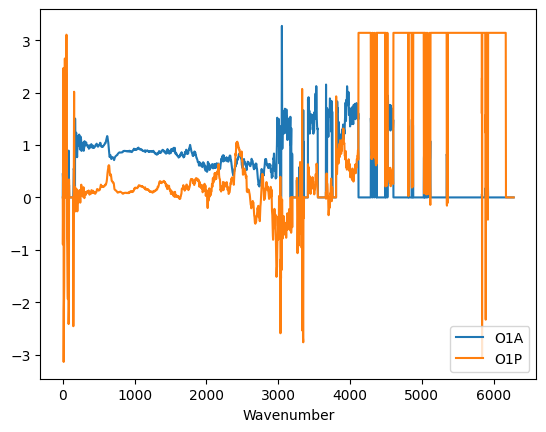

In [9]:
dataset['2025-06-26 164430 NF S Sn3O4_NB_A.txt']['data'].set_index('Wavenumber')[['O1A','O1P',]].plot()

In [16]:
main_string = " teste\n"

for k in dataset.keys():
    main_string += f"{k}\n"

print(main_string)

 teste
2025-06-27 104144 Interferograms Au-Ref02.Sn3o4.txt
2025-06-27 153953 Interferograms Sn3O4_NW_E.txt
2025-06-26 194848 NF LS Sn3O4_NB_B.txt
2025-06-27 184649 Interferograms DICS 2_AU_REF.txt
2025-06-26 171003 NF LS Sn3O4_NB_A.txt
2025-06-27 124015 Interferograms Sn3O4_NW_D.txt
2025-06-26 164430 NF S Sn3O4_NB_A.txt
2025-06-27 072830 NF LS Sn3O4_NB_D.txt
2025-06-27 015042 NF LS Sn3O4_NB_C_VERT.txt
2025-06-27 041244 NF LS Sn3O4_NB_C.txt
2025-06-28 042833 Interferograms DICS 2_MoWSe2_lao_h2o.txt
2025-06-27 190040 Interferograms DICS 2_AU_REF.txt
2025-06-27 213555 Interferograms DICS 2_FePS3.txt
2025-06-28 013602 Interferograms DICS 2_MoWSe2_lao_h2o.txt
2025-06-27 204141 Interferograms DICS 2_FePS3.txt
2025-06-27 234332 Interferograms DICS 2_FePS3.txt
2025-06-28 061635 Interferograms DICS 2_Car;la.txt
2025-06-27 215642 Interferograms DICS 2_FePS3.txt
2025-06-28 011515 Interferograms DICS 2_MoWSe2_lao_h2o.txt
2025-06-28 040745 Interferograms DICS 2_MoWSe2_lao_h2o.txt
2025-06-27 193240 

In [6]:
from matplotlib import pyplot as plt


def plot_files(dataset, x_col=0, y_col=1):
    """
    Plots the requested columns for all files in the dataset.
    x_col and y_col can be column names (strings) or column indices (integers).
    """
    # Initialize the plot layout
    plt.figure(figsize=(10, 6))
    
    # Iterate through every file processed in the dataset
    for filename, file_data in dataset.items():
        df = file_data['data']
        
        try:
            # Extract the X and Y data based on whether the user provided an index or a column name
            if isinstance(x_col, int):
                x_data = df.iloc[:, x_col]
                x_label = df.columns[x_col]
            else:
                x_data = df[x_col]
                x_label = x_col
                
            if isinstance(y_col, int):
                y_data = df.iloc[:, y_col]
                y_label = df.columns[y_col]
            else:
                y_data = df[y_col]
                y_label = y_col
            
            # Add the data to the plot, using the filename for the legend
            plt.plot(x_data, y_data, label=filename, linewidth=1.5)
            
        except (IndexError, KeyError) as e:
            print(f"Could not plot {filename} - column not found: {e}")
            continue

    # Configure plot visuals and labels
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title("Measurement Data Comparison", fontsize=14)
    
    # Place the legend outside the plot if there are many files
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Display the final plot
    plt.show()

Available columns to plot: ['Row', 'Column', 'Run', 'Depth', 'Z', 'M', 'O0A', 'O0P', 'O1A', 'O1P', 'O2A', 'O2P', 'O3A', 'O3P', 'O4A', 'O4P', 'O5A', 'O5P']
Could not plot 2025-06-27 104144 Interferograms Au-Ref02.Sn3o4.txt - column not found: 'Wavenumber'
Could not plot 2025-06-27 153953 Interferograms Sn3O4_NW_E.txt - column not found: 'Wavenumber'
Could not plot 2025-06-27 184649 Interferograms DICS 2_AU_REF.txt - column not found: 'Wavenumber'
Could not plot 2025-06-27 124015 Interferograms Sn3O4_NW_D.txt - column not found: 'Wavenumber'
Could not plot 2025-06-28 042833 Interferograms DICS 2_MoWSe2_lao_h2o.txt - column not found: 'Wavenumber'
Could not plot 2025-06-27 190040 Interferograms DICS 2_AU_REF.txt - column not found: 'Wavenumber'
Could not plot 2025-06-27 213555 Interferograms DICS 2_FePS3.txt - column not found: 'Wavenumber'
Could not plot 2025-06-28 013602 Interferograms DICS 2_MoWSe2_lao_h2o.txt - column not found: 'Wavenumber'
Could not plot 2025-06-27 204141 Interferog

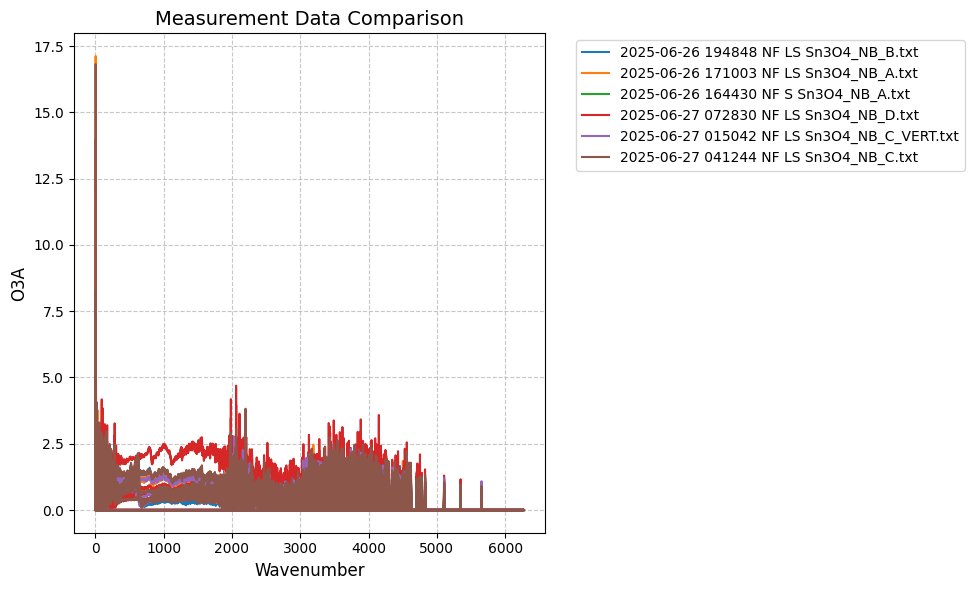

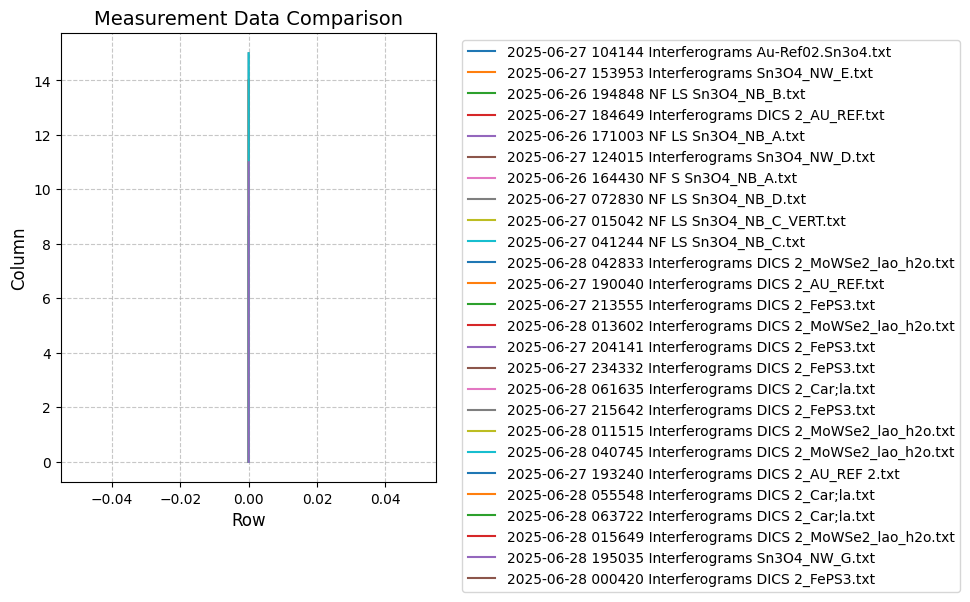

In [7]:
first_file = list(dataset.keys())[0]
available_columns = dataset[first_file]['data'].columns.tolist()
print(f"Available columns to plot: {available_columns}")

# You can plot by column index (e.g., column 2 on X, column 3 on Y)
# plot_files(dataset, x_col=2, y_col=3)

# Or you can plot by exact column name if your file has headers
plot_files(dataset, x_col="Wavenumber", y_col="O3A")

# Defaulting to the first two columns for demonstration
# print("\nPlotting the first two available columns...")
plot_files(dataset, x_col=0, y_col=1)